# **Performing Prediction specifically Type I Diabetes and Interpreting Them**



This presentation focuses on predicting Type I Diabetes using advanced machine learning techniques. We'll explore how Logistic Regression and Random Forest models can be used for prediction and delve into the realm of model explainability using SHAP (SHapley Additive exPlanations) and Eli5.

The dataset comprises various health metrics relevant to Type I Diabetes. Our goal is to use these data points to predict the onset of Type I Diabetes, which is crucial for early intervention and treatment strategies.

Early prediction of Type I Diabetes can significantly improve the management and treatment outcomes. It allows for timely medical intervention, reducing the risk of complications.

**Importing Libraries**

In [5]:
# Load EDA Pkgs
import pandas as pd    #powerful Python library for data manipulation and analysis.
import numpy as np     #essential for scientific computing 

**Machine Learning Libraries**

In [6]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression     #binary classification tasks
from sklearn.neighbors import KNeighborsClassifier      #implements the k-nearest neighbors vote for classification
from sklearn.model_selection import train_test_split    #for splitting data arrays into training and testing subsets
from sklearn.metrics import accuracy_score              #to evaluate the accuracy of a classification model.

**Visualization Libraries**

In [7]:
# Load Viz Pkgs
import matplotlib.pyplot as plt       #for creating static, interactive, and animated visualizations
%matplotlib inline
import seaborn as sns                 #data visualization

**Loading the Dataset**

In [8]:
# Load Dataset
df = pd.read_csv("diabetes-data.csv")

In [9]:
df['GENDER'] = df['GENDER'].astype(str)  # Convert to string


In [10]:
# Replace "Male" with 1 and "Female" with 0 under the "GENDER" column
df['GENDER'] = df['GENDER'].replace({'Male': 1, 'Female': 0})

In [11]:
df.head()

,PATIENT ID,GENDER,METABOLIC: GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,METABOLIC: INSULIN,BMI,TYPE I DIABETES PF,AGE,OUTCOME
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,1,148,72,35,0,33.6,0.627,50,1
1,801AFB51-036F-40E3-BDFE-FED4844BE275,1,85,66,29,0,26.6,0.351,31,0
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,0,183,64,0,0,23.3,0.672,32,1
3,DBB78149-D86C-435E-82C4-341999FD0719,0,89,66,23,94,28.1,0.167,21,0
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(1000, 10)

In [13]:
# Check For Missing Values
df.isna().sum()

PATIENT ID            0
GENDER                0
METABOLIC: GLUCOSE    0
BLOOD PRESSURE        0
SKIN THICKNESS        0
METABOLIC: INSULIN    0
BMI                   0
TYPE I DIABETES PF    0
AGE                   0
OUTCOME               0
dtype: int64

In [14]:
# Data Types
df.dtypes

PATIENT ID             object
GENDER                  int64
METABOLIC: GLUCOSE      int64
BLOOD PRESSURE          int64
SKIN THICKNESS          int64
METABOLIC: INSULIN      int64
BMI                   float64
TYPE I DIABETES PF    float64
AGE                     int64
OUTCOME                 int64
dtype: object

In [15]:
# Check For Occurence of Outcome
df.groupby('OUTCOME').size()

OUTCOME
0    636
1    364
dtype: int64

<AxesSubplot:xlabel='OUTCOME'>

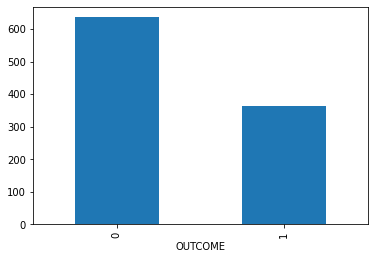

In [16]:
df.groupby('OUTCOME').size().plot(kind="bar")

In [17]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

Strength and Direction: Correlation coefficients range from -1 to 1. A coefficient close to 1 indicates a strong positive correlation (as one variable increases, so does the other), while a coefficient close to -1 indicates a strong negative correlation (as one variable increases, the other decreases). A coefficient near 0 suggests no linear correlation.

Correlation vs. Causation: It's crucial to note that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other.

<AxesSubplot:>

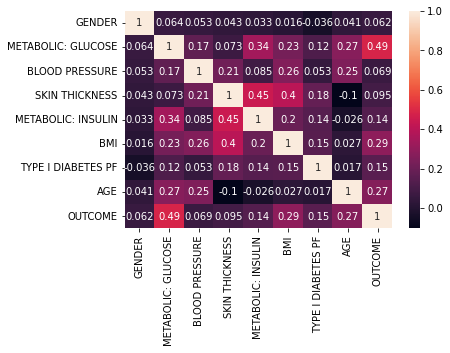

In [18]:
sns.heatmap(corr,annot=True)

# Data Viz of Entire Dataset

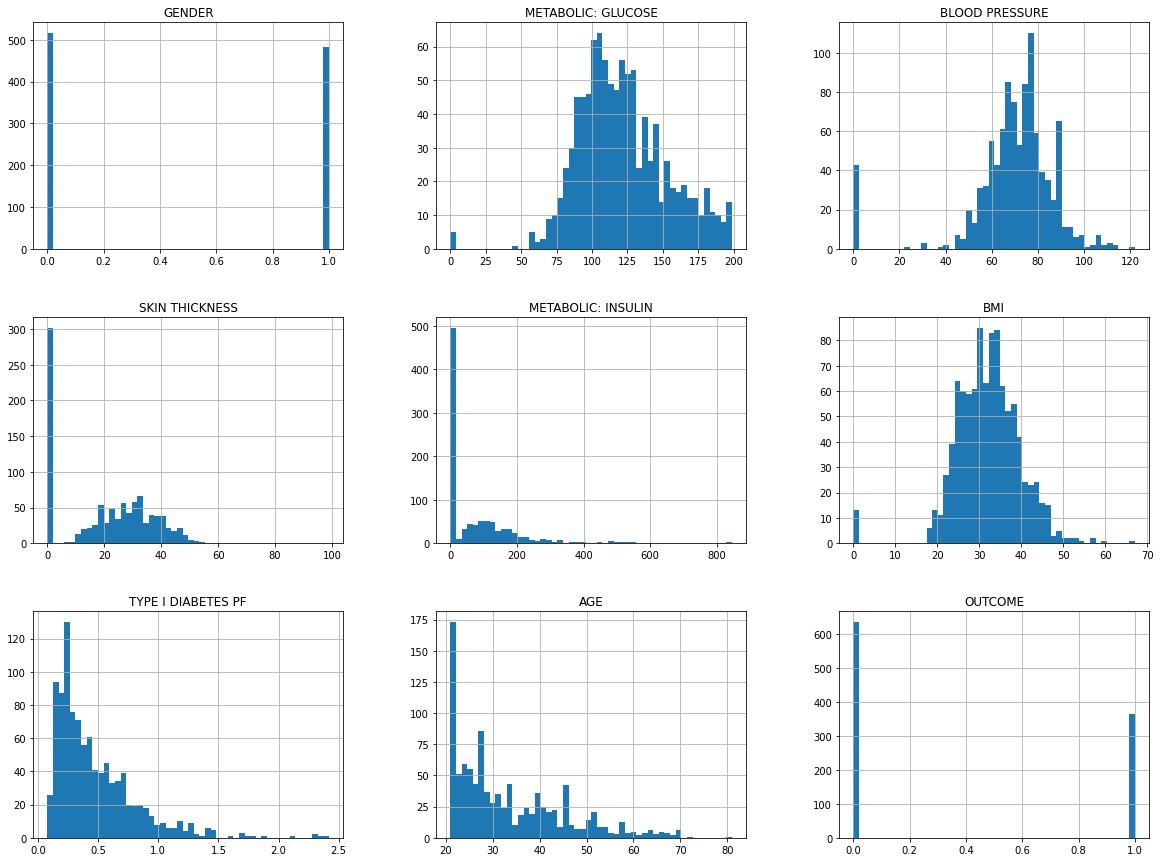

In [19]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [20]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,1000.0,0.484000,0.499994,0.000,0.000,0.0000,1.000,1.00
METABOLIC: GLUCOSE,1000.0,121.753000,31.516524,0.000,100.000,118.0000,140.250,199.00
BLOOD PRESSURE,1000.0,69.437000,19.130552,0.000,62.000,72.0000,80.000,122.00
SKIN THICKNESS,1000.0,20.629000,16.096847,0.000,0.000,23.0000,33.000,99.00
METABOLIC: INSULIN,1000.0,80.375000,117.009485,0.000,0.000,22.5000,127.250,846.00
BMI,1000.0,32.063500,7.715692,0.000,27.400,32.1500,36.600,67.10
TYPE I DIABETES PF,1000.0,0.472871,0.333795,0.078,0.238,0.3705,0.631,2.42
AGE,1000.0,33.381000,11.715421,21.000,24.000,29.0000,41.000,81.00
OUTCOME,1000.0,0.364000,0.481389,0.000,0.000,0.0000,1.000,1.00


### Data Cleaning

In [21]:
# Checking For Minimum In The columns
print('Glucose',df['METABOLIC: GLUCOSE'].min())
print('BP',df['BLOOD PRESSURE'].min())
print('ST', df['SKIN THICKNESS'].min())
print('BMI',df['BMI'].min())
print('Insuline', df['METABOLIC: INSULIN'].min())


Glucose 0
BP 0
ST 0
BMI 0.0
Insuline 0


In [22]:
# Replace 0 with Median not Mean
df['BLOOD PRESSURE'] = df['BLOOD PRESSURE'].replace(to_replace=0,value=df['BLOOD PRESSURE'].median())
df['METABOLIC: GLUCOSE'] = df['METABOLIC: GLUCOSE'].replace(to_replace=0,value=df['METABOLIC: GLUCOSE'].median())
df['SKIN THICKNESS'] = df['SKIN THICKNESS'].replace(to_replace=0,value=df['SKIN THICKNESS'].median())
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())
df['METABOLIC: INSULIN'] = df['METABOLIC: INSULIN'].replace(to_replace=0,value=df['METABOLIC: INSULIN'].median())

In [23]:
# Checking For Minimum In The columns (Again to be Sure)
print('Glucose',df['METABOLIC: GLUCOSE'].min())
print('BP',df['BLOOD PRESSURE'].min())
print('ST', df['SKIN THICKNESS'].min())
print('BMI',df['BMI'].min())
print('Insuline', df['METABOLIC: INSULIN'].min())

Glucose 44
BP 24
ST 7
BMI 18.2
Insuline 14.0


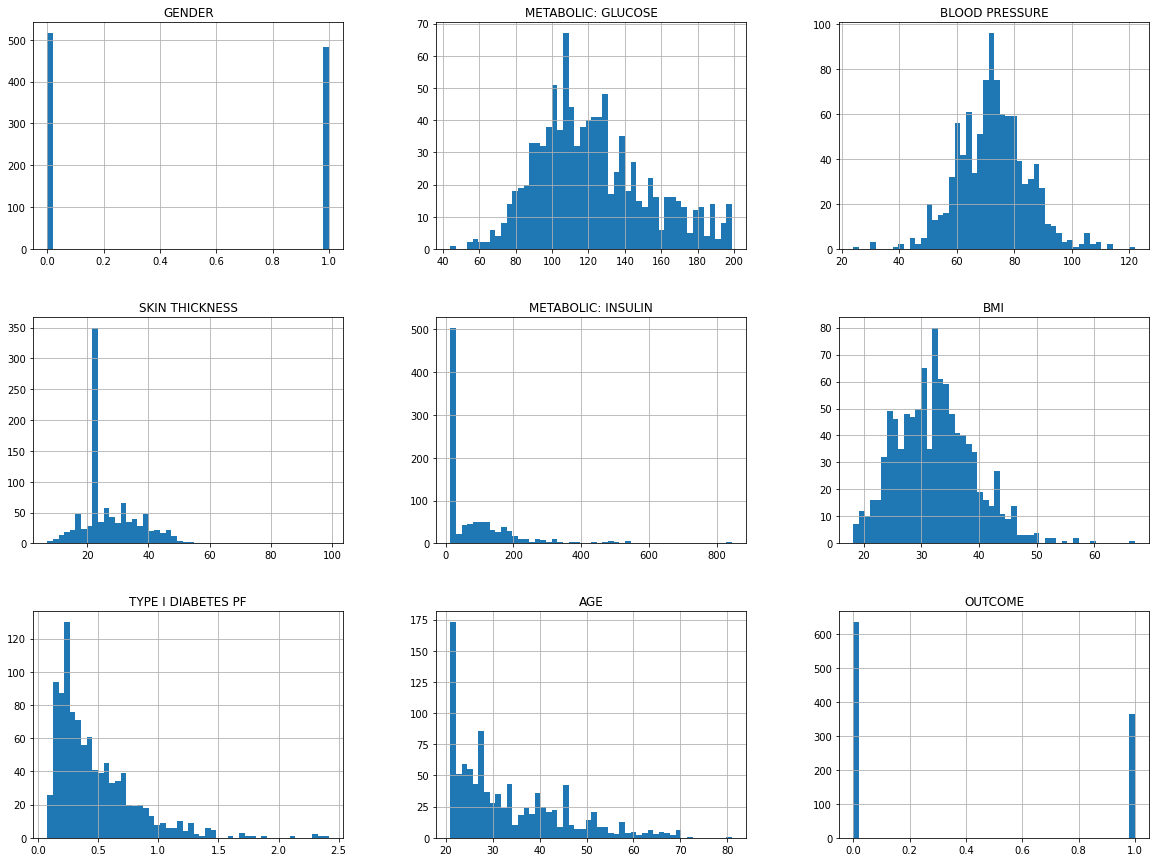

In [24]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Preparing Features for Testing and Training

In [25]:
df.columns

Index(['PATIENT ID', 'GENDER', 'METABOLIC: GLUCOSE', 'BLOOD PRESSURE',
       'SKIN THICKNESS', 'METABOLIC: INSULIN', 'BMI', 'TYPE I DIABETES PF',
       'AGE', 'OUTCOME'],
      dtype='object')

In [26]:
df.iloc[:,1:9]

,GENDER,METABOLIC: GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,METABOLIC: INSULIN,BMI,TYPE I DIABETES PF,AGE
0,1,148,72,35,22.5,33.6,0.627,50
1,1,85,66,29,22.5,26.6,0.351,31
2,0,183,64,23,22.5,23.3,0.672,32
3,0,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,0,98,58,33,190.0,34.0,0.430,43
996,0,154,78,30,100.0,30.9,0.164,45
997,0,165,68,26,168.0,33.6,0.631,49
998,0,99,58,10,22.5,25.4,0.551,21


In [27]:
Xfeatures = df.iloc[:,1:9]

In [28]:
Ylabels = df['OUTCOME']

In [29]:
Ylabels

0      1
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    1
Name: OUTCOME, Length: 1000, dtype: int64

Scale Dataset For ML

In [30]:
from sklearn.preprocessing import MinMaxScaler as Scaler

When you use these features in machine learning algorithms, the difference in scales can create problems. Some algorithms might incorrectly interpret features with larger ranges as being more important than those with smaller ranges
It does this by transforming each feature to a range between 0 and 1.

In [31]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [32]:
names = ['GENDER', 'METABOLIC: GLUCOSE', 'BLOOD PRESSURE',
       'SKIN THICKNESS', 'METABOLIC: INSULIN', 'BMI', 'TYPE I DIABETES PF',
       'AGE']

In [33]:
X.shape

(1000, 8)

In [34]:
X =pd.DataFrame(X, columns = names)

In [35]:
X

,GENDER,METABOLIC: GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,METABOLIC: INSULIN,BMI,TYPE I DIABETES PF,AGE
0,1.0,0.670968,0.489796,0.304348,0.010216,0.314928,0.234415,0.483333
1,1.0,0.264516,0.428571,0.239130,0.010216,0.171779,0.116567,0.166667
2,0.0,0.896774,0.408163,0.173913,0.010216,0.104294,0.253629,0.183333
3,0.0,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.0,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
995,0.0,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,0.366667
996,0.0,0.709677,0.551020,0.250000,0.103365,0.259714,0.036721,0.400000
997,0.0,0.780645,0.448980,0.206522,0.185096,0.314928,0.236123,0.466667
998,0.0,0.354839,0.346939,0.032609,0.010216,0.147239,0.201964,0.000000


Split Dataset for ML

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(800, 8)

Building the ML Models with:

*Logistic Regression

*KNN

In [38]:
# Logit
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [39]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))

Accuracy Score of Logisitic:: 0.775


In [40]:
X_test.values[0]

array([1.        , 0.51612903, 0.57142857, 0.2826087 , 0.13942308,
       0.30674847, 0.0969257 , 0.08333333])

In [41]:
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[120]).reshape(1,-1))

array([0], dtype=int64)

Interpreting the ML Models used above with:

*Shap : KernelExplainer :: Model agnostic (explains any function),slow,gives an approximation - shap.KernelExplainer(svm.predict_proba, X_train, link="logit")

*LIME




In [42]:
# Load ML Interpreting Models
import shap

c:\Users\THINKPAD\AppData\Local\Programs\Python\Python36\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
# Initialize JS For Plot
shap.initjs()

In [44]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [45]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [03:10<00:00,  1.05it/s]


In [46]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

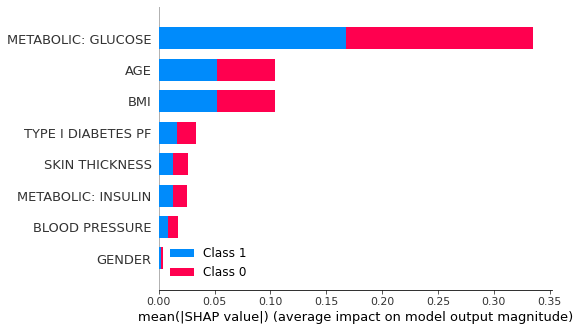

In [47]:
shap.summary_plot(shap_values,X_test)

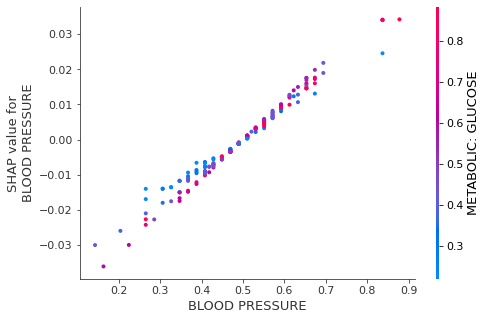

In [48]:
shap.dependence_plot(2,shap_values[0], X_test)

In [49]:
import eli5

In [50]:
# Showing the Weight for our model
eli5.show_weights(logit,top=10)

Weight?,Feature
+4.984,x1
+2.672,x5
+1.758,x7
+0.925,x3
+0.808,x6
+0.023,x0
-0.541,x2
-0.750,x4
-4.370,<BIAS>


In [51]:
feature_names = ['GENDER', 'METABOLIC: GLUCOSE', 'BLOOD PRESSURE',
       'SKIN THICKNESS', 'METABOLIC: INSULIN', 'BMI', 'TYPE I DIABETES PF',
       'AGE']

In [52]:
outcome_names = ['Non Diabetes','Diabetes']

In [53]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names = outcome_names)

Weight?,Feature
+4.984,METABOLIC: GLUCOSE
+2.672,BMI
+1.758,AGE
+0.925,SKIN THICKNESS
+0.808,TYPE I DIABETES PF
+0.023,GENDER
-0.541,BLOOD PRESSURE
-0.750,METABOLIC: INSULIN
-4.370,<BIAS>


In [54]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, X_test.iloc[120],feature_names=feature_names,target_names=outcome_names)

# Using Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Now, after using the same train/test data, we predict the outcome and test the accuracy

In [57]:
predictions = rf_classifier.predict(X_test)

In [58]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1], dtype=int64)

In [59]:
single_prediction_input = pd.DataFrame(X_test.iloc[123, :]).transpose()
single_prediction = rf_classifier.predict(single_prediction_input)
single_prediction

array([1], dtype=int64)

In [60]:
accuracy = accuracy_score(y_test, predictions)

In [61]:
accuracy

0.81

The Random Forest Classifier shoes around a 5% increase in accuracy

We now use SHAP and ELI5 to visualise the results

SHAP:

In [62]:
explainer = shap.Explainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

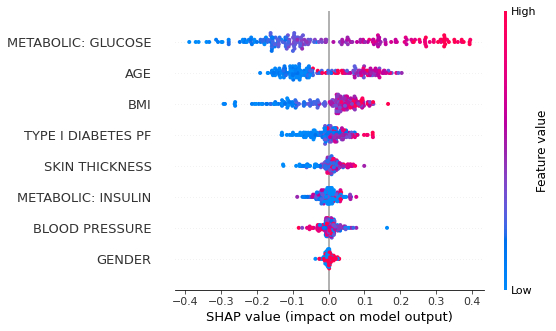

In [63]:
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)

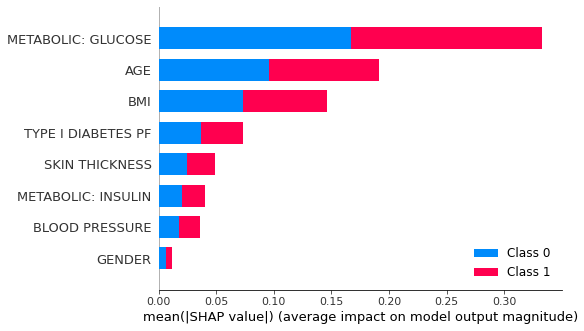

In [64]:
shap.summary_plot(shap_values,X_test)

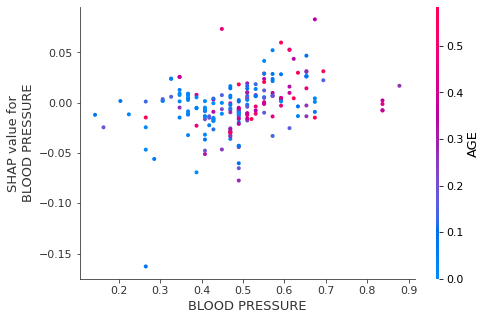

In [65]:
shap.dependence_plot(2,shap_values[0], X_test)

In [66]:
eli5.show_weights(rf_classifier, feature_names=list(X_train.columns), target_names = outcome_names)

Weight,Feature
0.2908 ± 0.1334,METABOLIC: GLUCOSE
0.1743 ± 0.0998,BMI
0.1507 ± 0.0936,AGE
0.1273 ± 0.0630,TYPE I DIABETES PF
0.0899 ± 0.0522,BLOOD PRESSURE
0.0752 ± 0.0525,METABOLIC: INSULIN
0.0750 ± 0.0566,SKIN THICKNESS
0.0168 ± 0.0192,GENDER


In [76]:
# Show Explaination For A Single Prediction
eli5.show_prediction(rf_classifier, X_test.iloc[120],feature_names=feature_names,target_names=outcome_names)

# **Conclusion**

**The integration of Logistic Regression, Random Forest, and XAI tools like SHAP and Eli5 demonstrated the power and flexibility of machine learning in healthcare.
This project highlighted the importance of not only making accurate predictions but also understanding the ‘why’ behind these predictions, which is crucial in sensitive fields like healthcare.**

**Logistic Regression was chosen for its efficiency in simple, linear scenarios, serving as a baseline for performance and interpretability.**

**Random Forest excelled in handling complex, non-linear data interactions, providing robustness and higher accuracy in predictions.**

**SHAP offered in-depth insights into model decisions, especially for complex models like Random Forest, highlighting influential features.**

**Eli5 provided clear, concise explanations of model predictions, particularly beneficial for simpler models like Logistic Regression.**

# **Future Goals**

Enhance model accuracy and reliability with advanced algorithms and larger datasets.

Expand the project to predict other related health conditions.

Improve user interface for non-technical stakeholders, making model outputs more accessible.